# Technical Requirements

In [1]:
# %config Completer.use_jedi = False
#!conda install pandas matplotlib 
#!pip install pandas matplotlib 

For the latest version of statsmodels

In [ ]:
#!pip install git+https://github.com/statsmodels/statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [3]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [14, 4]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [4]:
import statsmodels as sm
from statsmodels.tools.eval_measures import rmse, rmspe
print(f'''
statsmodels -> {sm.__version__}
''')


statsmodels -> 0.14.0.dev419+gef5d57a8d



In [5]:
folder = Path('../../datasets/Ch15/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
df.sort_index(inplace=True)
df = df.resample('H').max()
df.columns = ['y']
df.ffill(inplace=True)

In [6]:
df.isna().sum()

y    0
dtype: int64

In [7]:
df.shape

(121296, 1)

In [8]:
set(df.index.year)

{2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018}

<AxesSubplot:xlabel='Datetime'>

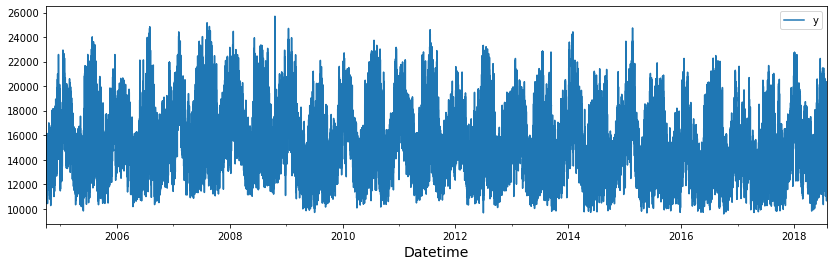

In [9]:
df.plot()

# Decomposing Time Series with Multiple Seasonality using MSTL

In [10]:
day = 24
week = day*7
month = round(week*4.35)
year = round(month*12)
print(f'''
day = {day} hours
week = {week} hours
month = {month} hours
year = {year} hours
''')


day = 24 hours
week = 168 hours
month = 731 hours
year = 8772 hours



In [11]:
from statsmodels.tsa.seasonal import MSTL
plt.rcParams["figure.figsize"] = [14, 8]

In [12]:
df.index.freq

<Hour>

In [13]:
mstl = MSTL(df, periods=(24, 24*7))
results = mstl.fit()

<bound method Figure.tight_layout of <Figure size 1008x576 with 5 Axes>>

<Figure size 1008x576 with 0 Axes>

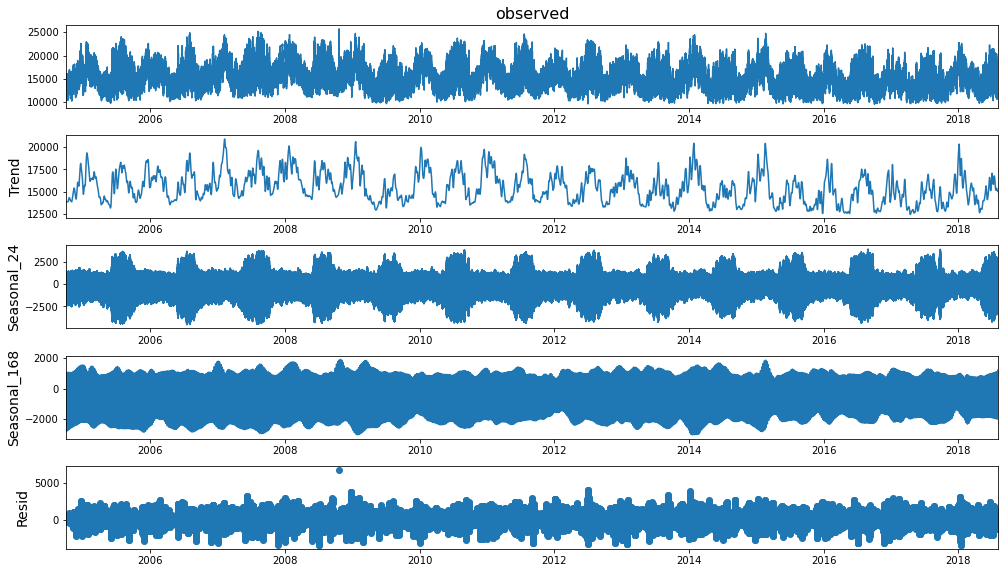

In [14]:
plt.figure(figsize=(14, 8))
ax = results.plot()
ax.tight_layout

In [17]:
# df.loc['2016-01-04':'2016-01-06'].index.day_name()

In [18]:
# df.loc['2016-07-04':'2016-07-06'].index.day_name()

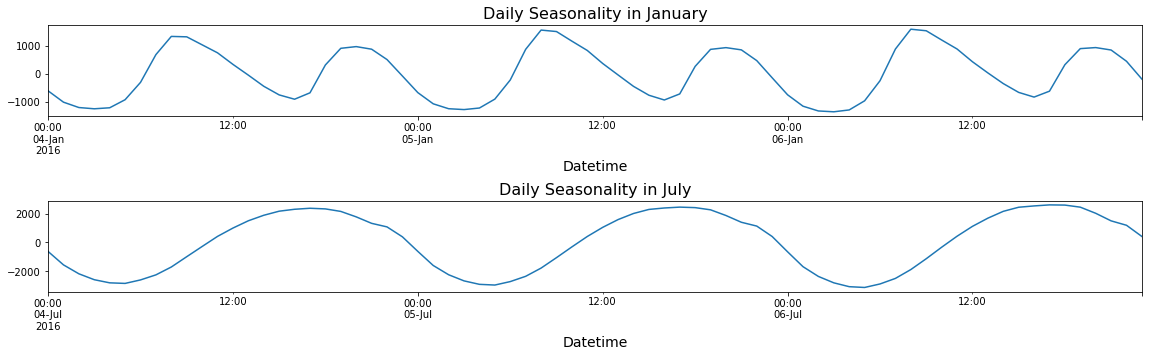

In [15]:
# mask = results.seasonal.index.month==7
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_24']
         .loc['2016-01-04':'2016-01-06']
         .plot(ax=ax[0], 
               title='Daily Seasonality in January'))
(results.seasonal['seasonal_24']
         .loc['2016-07-04':'2016-07-06']
         .plot(ax=ax[1], 
               title='Daily Seasonality in July'))
fig.tight_layout(); plt.show()

In [16]:
# df.loc['2016-01-04':'2016-01-10'].index.day_name()

In [17]:
# df.loc['2016-01-04':'2016-01-10'].index.day_name()

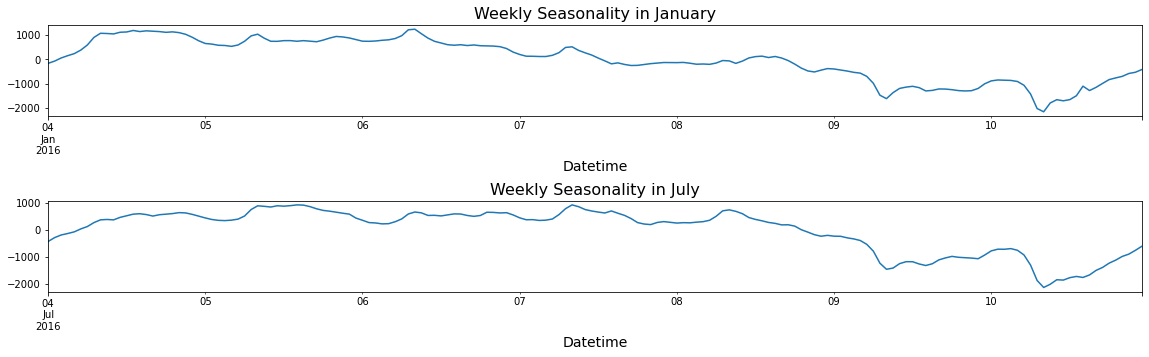

In [18]:
# mask = results.seasonal.index.month==7
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_168']
         .loc['2016-01-04':'2016-01-10']
         .plot(ax=ax[0], 
               title='Weekly Seasonality in January'))
(results.seasonal['seasonal_168']
         .loc['2016-07-04':'2016-07-10']
         .plot(ax=ax[1], 
               title='Weekly Seasonality in July'))
fig.tight_layout(); plt.show()

## There is more

In [19]:
df.head()

,y
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0


Note: Running time will be slower in the following example

defult values for windows

In [42]:
n = 2
7 + 4 * np.arange(1, n + 1, 1)

array([11, 15])

In [38]:
mstl = MSTL(df, periods=(24, 24*7), iterate=4, windows=[121, 121])
results = mstl.fit()

In [20]:
# mstl = MSTL(df, periods=(day, week, year))
# results = mstl.fit()

In [39]:
results.seasonal

,seasonal_24,seasonal_168
Datetime,,
2004-10-01 01:00:00,-1679.480941,310.793623
2004-10-01 02:00:00,-2118.502842,305.601582
2004-10-01 03:00:00,-2366.747343,300.390028
2004-10-01 04:00:00,-2436.134303,315.263059
2004-10-01 05:00:00,-2328.267260,356.349291
...,...,...
2018-08-02 20:00:00,2474.844589,387.676073
2018-08-02 21:00:00,1734.443244,389.830116
2018-08-02 22:00:00,1239.335395,406.616123


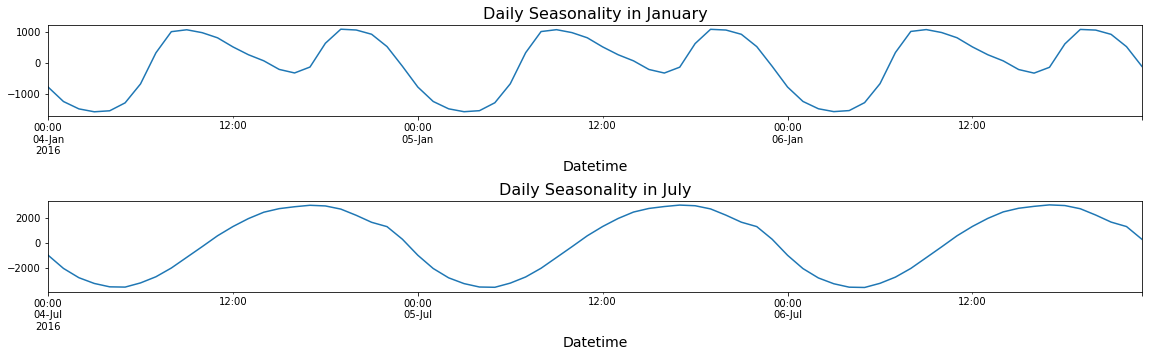

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_24']
         .loc['2016-01-04':'2016-01-06']
         .plot(ax=ax[0], 
               title='Daily Seasonality in January'))
(results.seasonal['seasonal_24']
         .loc['2016-07-04':'2016-07-06']
         .plot(ax=ax[1], 
               title='Daily Seasonality in July'))
fig.tight_layout(); plt.show()

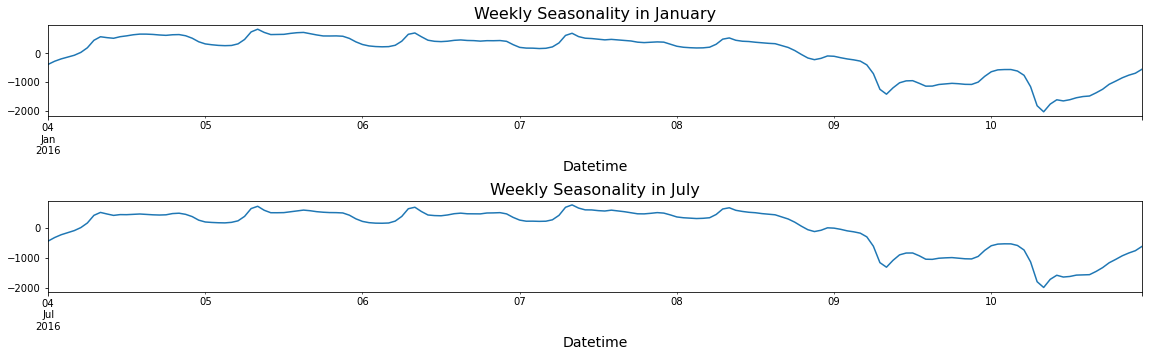

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_168']
         .loc['2016-01-04':'2016-01-10']
         .plot(ax=ax[0], 
               title='Weekly Seasonality in January'))
(results.seasonal['seasonal_168']
         .loc['2016-07-04':'2016-07-10']
         .plot(ax=ax[1], 
               title='Weekly Seasonality in July'))
fig.tight_layout(); plt.show()

# Forecasting Time Series with Multiple Seasonality Unobserved Components using (UCM)

In [67]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
plt.rcParams["figure.figsize"] = [14, 4]

In [68]:
pd.date_range('2004-10-01 01:00:00', '2018-08-03 00:00:00', freq='H')

DatetimeIndex(['2004-10-01 01:00:00', '2004-10-01 02:00:00',
               '2004-10-01 03:00:00', '2004-10-01 04:00:00',
               '2004-10-01 05:00:00', '2004-10-01 06:00:00',
               '2004-10-01 07:00:00', '2004-10-01 08:00:00',
               '2004-10-01 09:00:00', '2004-10-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', length=121296, freq='H')

### Splitting the data

In [69]:
train = df.iloc[:-month]
test = df.iloc[-month:]

In [70]:
train

,y
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0
...,...
2018-07-03 09:00:00,15838.0
2018-07-03 10:00:00,16991.0
2018-07-03 11:00:00,18207.0


In [71]:
test

,y
Datetime,
2018-07-03 14:00:00,20999.0
2018-07-03 15:00:00,21321.0
2018-07-03 16:00:00,21367.0
2018-07-03 17:00:00,21481.0
2018-07-03 18:00:00,21448.0
...,...
2018-08-02 20:00:00,17673.0
2018-08-02 21:00:00,17303.0
2018-08-02 22:00:00,17001.0


In [72]:
print(len(df))
print(len(train))
print(len(test))
print(len(test)/len(df.loc['2013':])*100)

121296
120565
731
1.4930250607626478


In [73]:
len(test) + len(train) == len(df)

True

<AxesSubplot:xlabel='Datetime'>

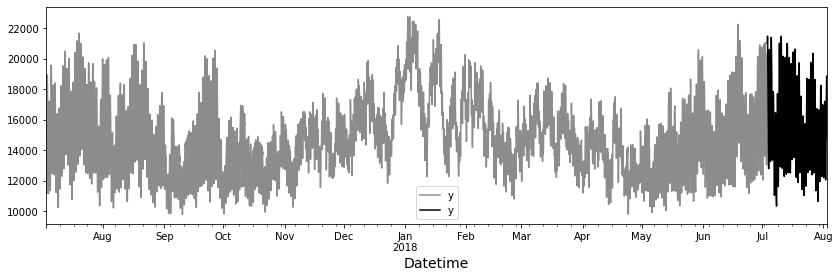

In [74]:
ax = train.iloc[-year:].plot(style='k-', alpha=0.45)
test.plot(ax=ax, style='k')

<AxesSubplot:xlabel='Datetime'>

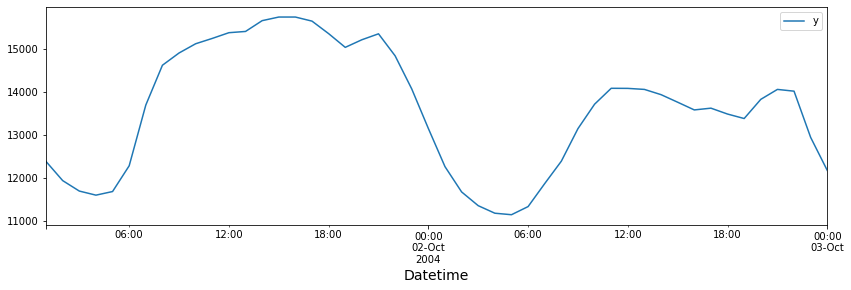

In [75]:
train.iloc[:day*2].plot()

<AxesSubplot:xlabel='Datetime'>

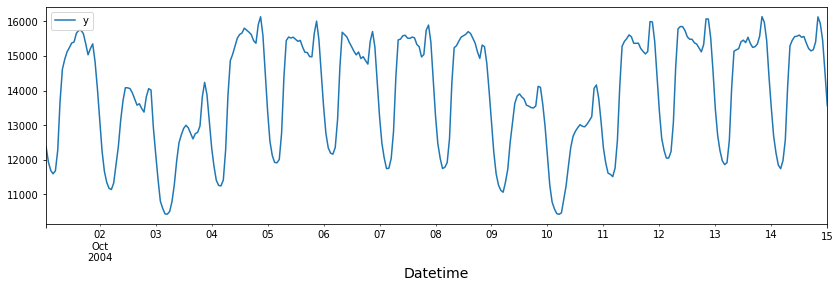

In [76]:
train.iloc[:week*2].plot()

<AxesSubplot:xlabel='Datetime'>

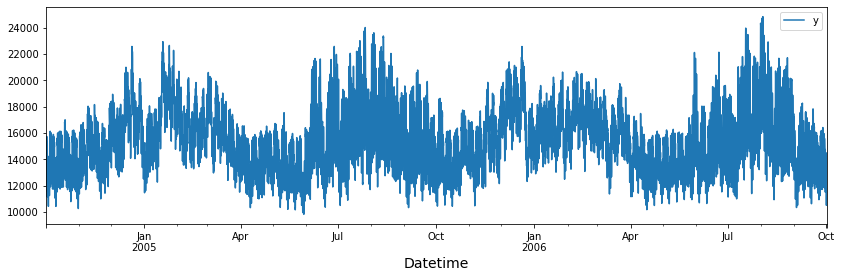

In [77]:
train.iloc[:year*2].plot()

### UCM Model

In [78]:
params = {'level':'dtrend',
        'irregular':True,
        'freq_seasonal':[{'period': day, 'harmonics':2},
                        {'period': week, 'harmonics':2},
                        {'period': year, 'harmonics':2}],
        'stochastic_freq_seasonal':[False, False, False]}

model = UnobservedComponents(train, **params)
                                        

results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.85326D+00    |proj g|=  1.90979D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      6      1     0     0   7.584D-06   8.837D+00
  F =   8.8366389515683590     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [54]:
results

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                            y   No. Observations:               120565
Model:                  deterministic trend   Log Likelihood            -1065389.375
                     + freq_seasonal(24(2))   AIC                        2130780.750
                    + freq_seasonal(168(2))   BIC                        2130790.450
                   + freq_seasonal(8772(2))   HQIC                       2130783.670
Date:                      Sun, 15 May 2022                                         
Time:                              21:58:15                                         
Sample:                          10-01-2004                                         
                               - 07-03-2018                                         
Covariance Type:                        opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2.735e+06   1.01e+04    271.467      0.000    2.72e+06    2.75e+06
===================================================================================
Ljung-Box (L1) (Q):              114494.70   Jarque-Bera (JB):              6780.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Model Performance and Analysis

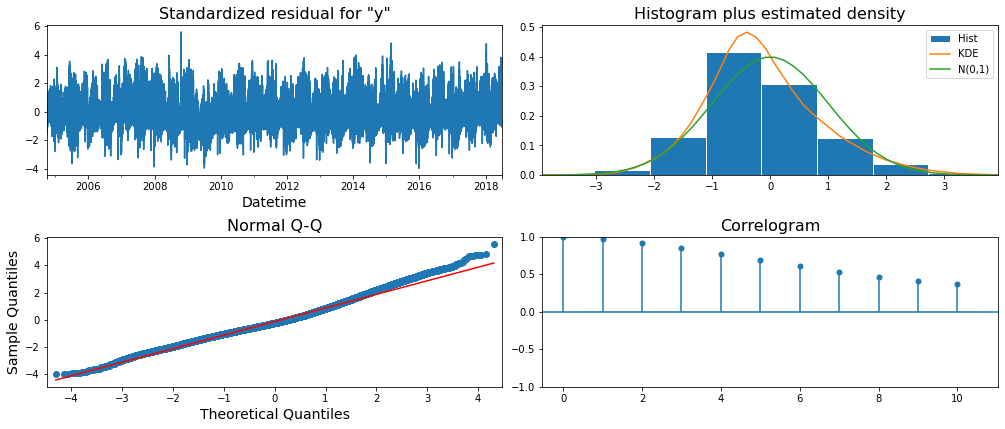

In [80]:
fig = results.plot_diagnostics(figsize=(14, 6))
fig.tight_layout()

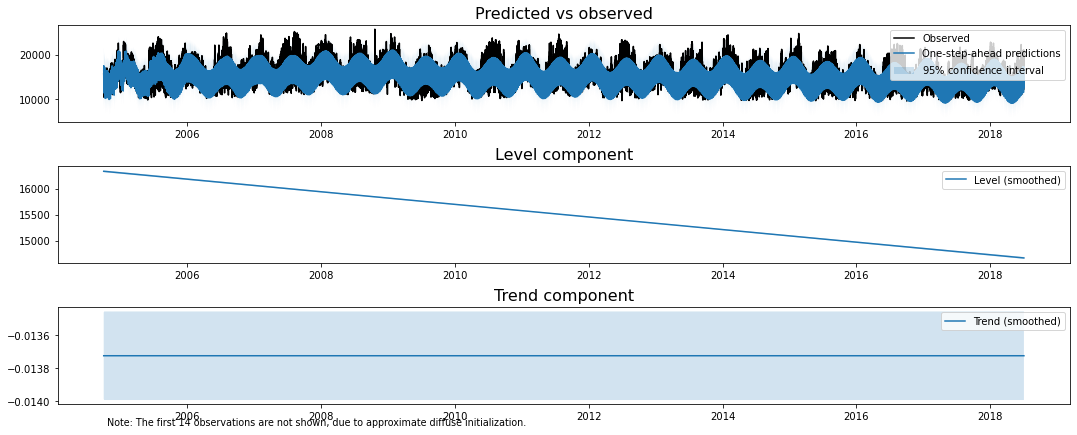

In [81]:
fig = results.plot_components(figsize=(15, 6), 
                              freq_seasonal=False, 
                              which='smoothed')
fig.tight_layout()

available `.fit()` methods. Default is `lbfgs`
```
    'newton' for Newton-Raphson
    'nm' for Nelder-Mead
    'bfgs' for Broyden-Fletcher-Goldfarb-Shanno (BFGS)
    'lbfgs' for limited-memory BFGS with optional box constraints
    'powell' for modified Powell's method
    'cg' for conjugate gradient
    'ncg' for Newton-conjugate gradient
    'basinhopping' for global basin-hopping solver
 ```

In [82]:
len(results.freq_seasonal)

3

In [83]:
len(results.freq_seasonal[0])

6

In [84]:
results.freq_seasonal[1].keys()

dict_keys(['filtered', 'filtered_cov', 'smoothed', 'smoothed_cov', 'offset', 'pretty_name'])

In [85]:
results.freq_seasonal[0]['smoothed'].shape

(120565,)

In [86]:
train.shape

(120565, 1)

<AxesSubplot:title={'center':'Daily Seasonality'}, xlabel='hour_of_day'>

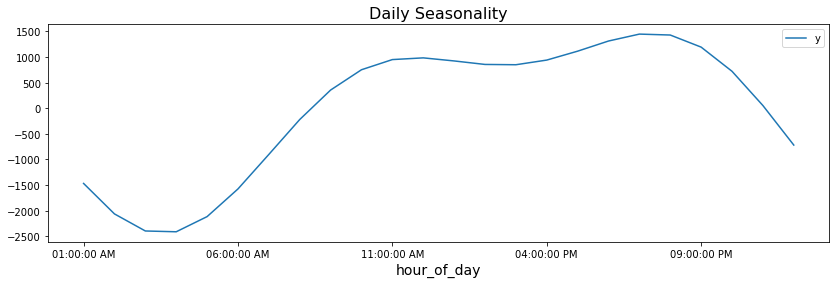

In [113]:
daily = pd.DataFrame(results.freq_seasonal[0]['smoothed'], 
                        index=train.index, columns=['y']).iloc[:day]
daily['hour_of_day'] = daily.index.strftime(date_format = '%I:%M:%S %p')
daily.plot(y='y', x='hour_of_day', title='Daily Seasonality')

<AxesSubplot:title={'center':'Weekly Seasonality'}, xlabel='day_name'>

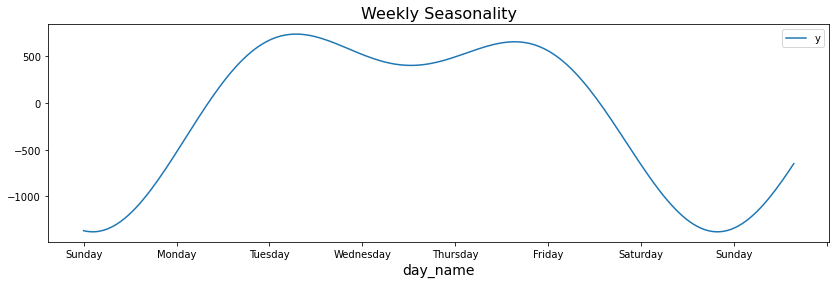

In [107]:
weekly = pd.DataFrame(results.freq_seasonal[1]['smoothed'], 
                         index=train.index, columns=['y']).loc['2004-10-03': '2004-10-10']
weekly['day_name'] = weekly.index.strftime(date_format = '%A')
weekly.plot(y='y', x='day_name', title='Weekly Seasonality')

In [117]:
two_years

,y,month
Datetime,,
2005-01-01 00:00:00,1779.190832,2005-January
2005-01-01 01:00:00,1780.641436,2005-January
2005-01-01 02:00:00,1782.089130,2005-January
2005-01-01 03:00:00,1783.533909,2005-January
2005-01-01 04:00:00,1784.975772,2005-January
...,...,...
2006-12-31 19:00:00,1735.870535,2006-December
2006-12-31 20:00:00,1737.404247,2006-December
2006-12-31 21:00:00,1738.935137,2006-December


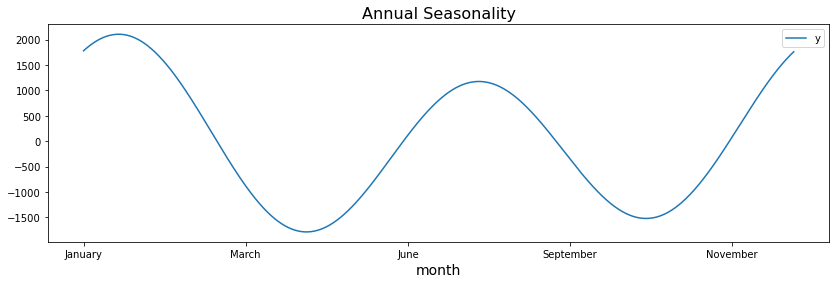

In [132]:
annual = pd.DataFrame(results.freq_seasonal[2]['smoothed'], 
                         index=train.index, columns=['y']).loc['2005']
annual['month'] = annual.index.strftime(date_format = '%B')
ax = annual.plot(y='y', x='month', title='Annual Seasonality')

In [230]:
results.freq_seasonal[2]

{'filtered': array([1456.5367536 , 1886.10640315, 1967.74904291, ..., -508.13053677,
        -508.10898563, -508.07626252]),
 'filtered_cov': array([8.82338092e+05, 8.45135217e+05, 8.37457301e+05, ...,
        7.46856555e+01, 7.46856550e+01, 7.46856544e+01]),
 'smoothed': array([ -35.89504842,  -35.52993311,  -35.16479957, ..., -507.99768506,
        -508.03710411, -508.07626252]),
 'smoothed_cov': array([74.68566283, 74.68448113, 74.68329949, ..., 74.68329106,
        74.6844727 , 74.6856544 ]),
 'offset': 6,
 'pretty_name': 'seasonal 8772(1)'}

In [232]:
annual = pd.DataFrame(results.freq_seasonal[2]['filtered'], 
                         index=train.index, columns=['y']).loc['2005']
annual['month'] = annual.index.strftime(date_format = '%B')
ax = annual.plot(y='y', x='month', title='Annual Seasonality')

In [133]:
prediction = results.predict(start=test.index.min(), 
                end=test.index.max())

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

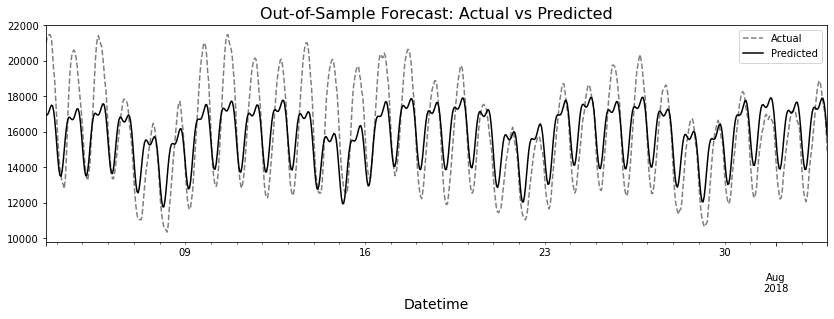

In [134]:
test.plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [151]:
rmspe(test['y'], prediction)

1.0676342700345198

In [152]:
rmse(test['y'], prediction)

1716.1196099493693

## There is more

In [197]:
params = {'level':'dtrend',
        'irregular':True,
        'freq_seasonal':[{'period': day, 'harmonics':1},
                        {'period': week, 'harmonics':1},
                        {'period': year, 'harmonics':1}],
        'stochastic_freq_seasonal':[False, False, False]}

model = UnobservedComponents(train, **params)
                                        

results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26260D+00    |proj g|=  7.47521D-04

At iterate    5    f=  9.08381D+00    |proj g|=  4.13980D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      9      1     0     0   4.140D-06   9.084D+00
  F =   9.0838130222914284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [27]:
results.summary()

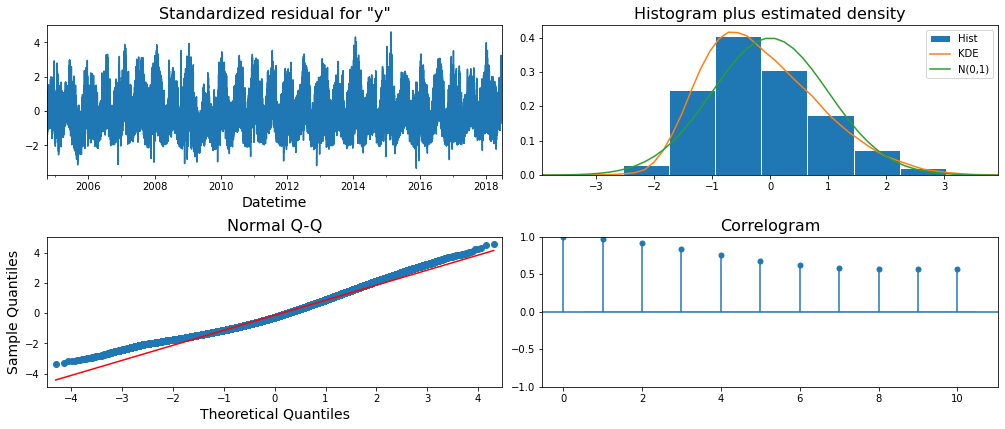

In [199]:
fig = results.plot_diagnostics(figsize=(14, 6))
fig.tight_layout()

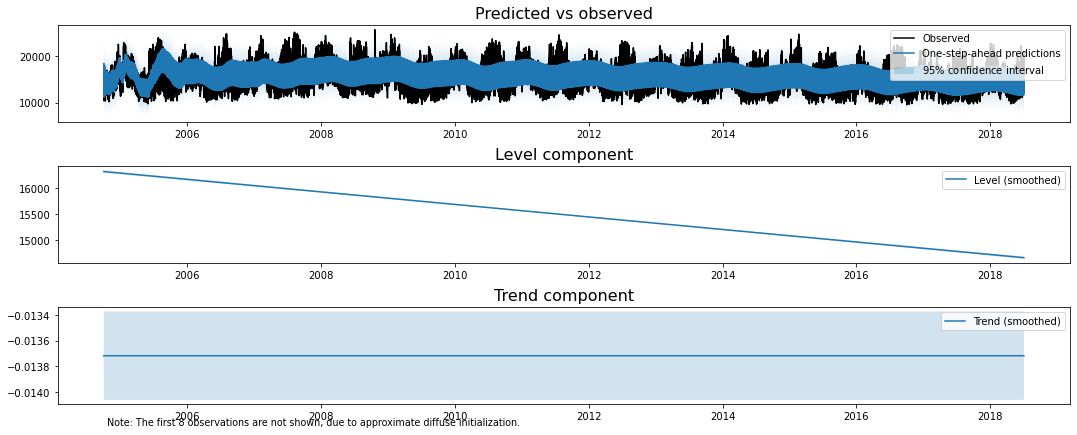

In [200]:
fig = results.plot_components(figsize=(15, 6), 
                              freq_seasonal=False, 
                              which='smoothed')
fig.tight_layout()

<AxesSubplot:title={'center':'Daily Seasonality'}, xlabel='hour_of_day'>

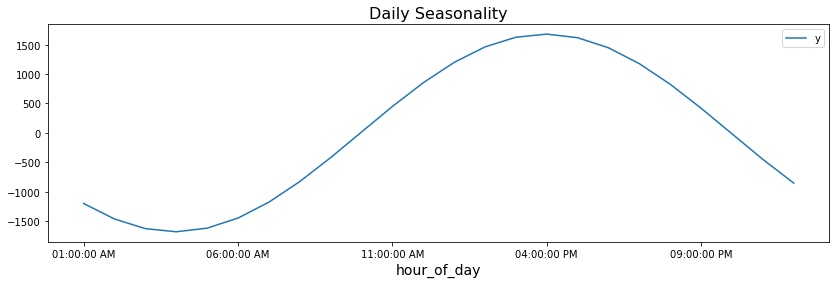

In [201]:
daily = pd.DataFrame(results.freq_seasonal[0]['smoothed'], 
                        index=train.index, columns=['y']).iloc[:day]
daily['hour_of_day'] = daily.index.strftime(date_format = '%I:%M:%S %p')
daily.plot(y='y', x='hour_of_day', title='Daily Seasonality')

<AxesSubplot:title={'center':'Weekly Seasonality'}, xlabel='day_name'>

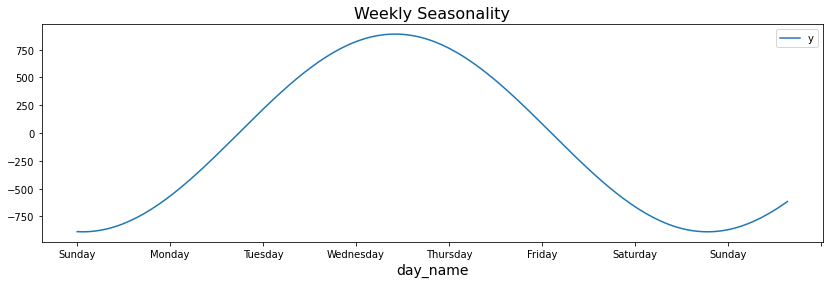

In [202]:
weekly = pd.DataFrame(results.freq_seasonal[1]['smoothed'], 
                         index=train.index, columns=['y']).loc['2004-10-03': '2004-10-10']
weekly['day_name'] = weekly.index.strftime(date_format = '%A')
weekly.plot(y='y', x='day_name', title='Weekly Seasonality')

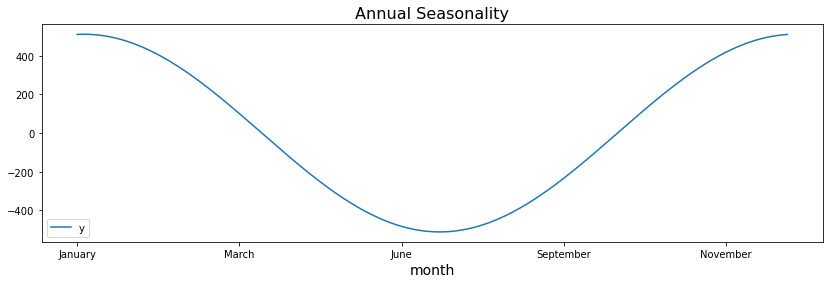

In [203]:
annual = pd.DataFrame(results.freq_seasonal[2]['smoothed'], 
                         index=train.index, columns=['y']).loc['2005']
annual['month'] = annual.index.strftime(date_format = '%B')
ax = annual.plot(y='y', x='month', title='Annual Seasonality')

In [204]:
prediction = results.predict(start=test.index.min(), 
                end=test.index.max())

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

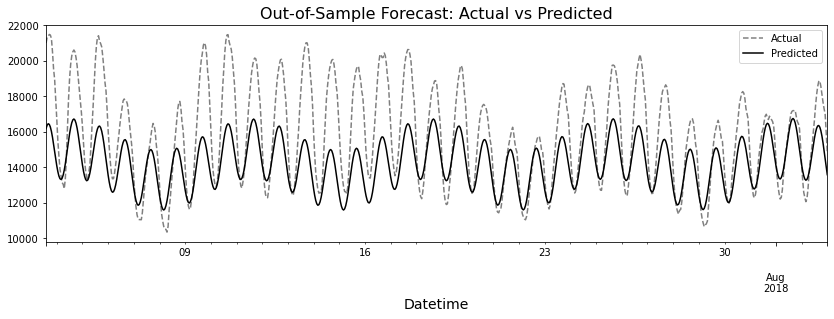

In [205]:
test.plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [206]:
rmspe(test['y'], prediction)

1.271709112104233

In [207]:
rmse(test['y'], prediction)

2336.3055139809103

# Using Prophet

In [208]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [29]:
# uncomment below if you need to reload the data set
# folder = Path('../../datasets/Ch15/')
# file = folder.joinpath('AEP_hourly.csv')

# df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
# df.sort_index(inplace=True)
# df = df.resample('H').max()
# df.columns = ['y']
# df.ffill(inplace=True)

In [211]:
energy = df.copy()

In [212]:
energy.reset_index(inplace=True)
energy.columns = ['ds', 'y']

In [214]:
train = energy.iloc[:-month]
test = energy.iloc[-month:]

### Prophet Model

In [215]:
model = Prophet().fit(train)

Initial log joint probability = -1366.71
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        275236     0.0735659       20198.8           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        275795     0.0102461       7020.54      0.9396      0.9396      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        276058     0.0251783       10810.9           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        276214    0.00716067       2659.17           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        276357    0.00119094       5021.96      0.1476           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [216]:
n = len(test)
future = model.make_future_dataframe(n, freq='H')

In [217]:
future

,ds
0,2004-10-01 01:00:00
1,2004-10-01 02:00:00
2,2004-10-01 03:00:00
3,2004-10-01 04:00:00
4,2004-10-01 05:00:00
...,...
121291,2018-08-02 20:00:00
121292,2018-08-02 21:00:00
121293,2018-08-02 22:00:00
121294,2018-08-02 23:00:00


In [218]:
forecast = model.predict(future)

In [219]:
model

### Model Performance and Analysis

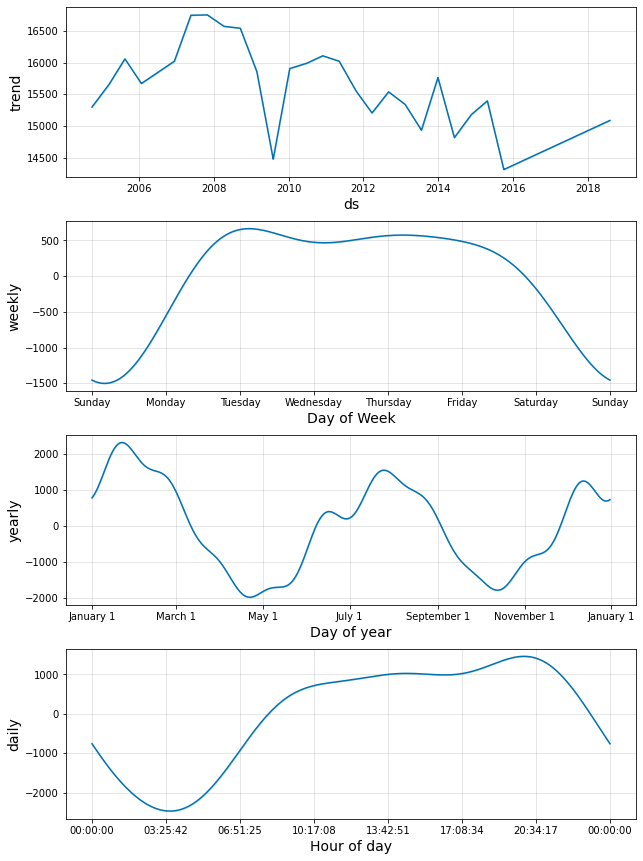

In [220]:
model.plot_components(forecast); plt.show()

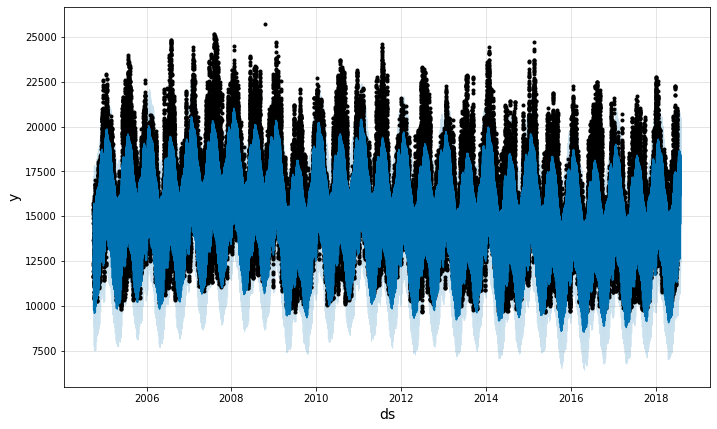

In [221]:
model.plot(forecast);plt.show()

In [223]:
prediction = forecast.iloc[test.index[0]:].set_index('ds')['yhat']

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

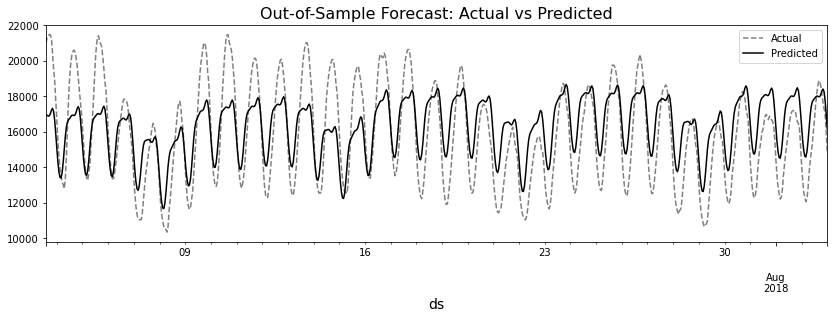

In [224]:
test.set_index('ds').plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [225]:
rmspe(test['y'].values, prediction.values)

1.2587190915113151

In [226]:
rmse(test['y'].values, prediction.values)

1885.143242946697

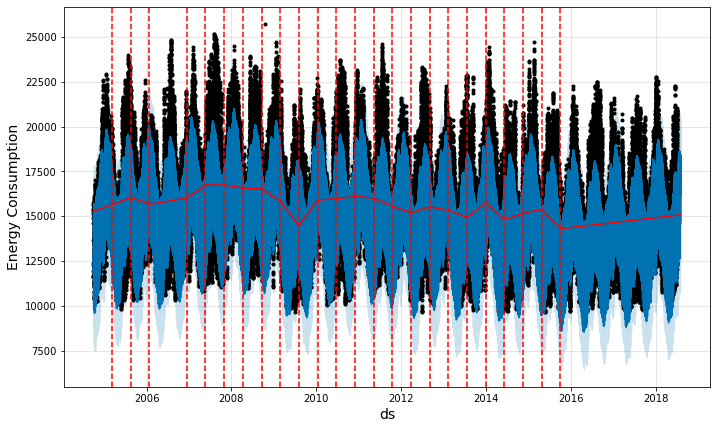

In [241]:
fig = model.plot(forecast, ylabel='Energy Consumption')
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=0.01)
plt.show()